# the Data

The Book-Crossing dataset comprises 3 files.
● Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
● Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
● Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. # 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
books=pd.read_csv("Books.csv")
books.head()

C:\Users\Anil\AppData\Local\Temp\ipykernel_20036\1183612970.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Data Understanding
     Summerize Data

In [3]:
rating=pd.read_csv("Ratings.csv")
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
user=pd.read_csv(r"C:\Users\Anil\Downloads\groups,dataset,objective(1)\Users.csv")
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### shape of the data

In [5]:
print(books.shape)
print(user.shape)
print(rating.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Size of the Data 

In [6]:
print(books.size)
print(user.size)
print(rating.size)

2170880
836574
3449340


### Columns 

In [7]:
print(books.columns)

print(user.columns)

print(rating.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


### Data types

In [8]:
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [9]:
print(user.dtypes)

User-ID       int64
Location     object
Age         float64
dtype: object


### Infomation of dataset 

In [10]:
print(rating.dtypes)

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [11]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [12]:
print(user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None


In [13]:
print(rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


### Number of unique values in each columns

In [14]:
print("Number of unique values in each columns:",books.nunique())

Number of unique values in each columns: ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64


In [15]:
print("Number of unique values in each columns:",user.nunique())

Number of unique values in each columns: User-ID     278858
Location     57339
Age            165
dtype: int64


In [16]:
print("Number of unique values in each columns:",rating.nunique())

Number of unique values in each columns: User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


### Finding null values or number of missing values

In [17]:
print("Number of missing values in each column:",books.isnull().sum())

Number of missing values in each column: ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [18]:
books.dropna(inplace=True)

### if there is a null values it will give the wrong Analysis and it gives incomplete in accurate  gives result so we are replacing null values

In [19]:
books['Book-Author'].fillna('Book-Author', inplace=True)

In [20]:
books['Book-Author'].fillna('Publisher', inplace=True)
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

###  Image column does not provide meaningful information for our analysis so thats why i will not replace Nan values

### if suppose i will not replace the Nan values it is affected to bias and model performance gives incorrect so i will replace the Nan values through the mean. we can fill the missing values through the mean,median and mode


In [21]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271354,271354,271354,271354,271354,271354,271354,271354
unique,271354,242130,102020,200,16803,271038,271038,271038
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
freq,1,27,632,13902,7535,2,2,2


In [22]:
print("Number of missing values in each column:",user.isnull().sum())

Number of missing values in each column: User-ID          0
Location         0
Age         110762
dtype: int64


In [23]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<Axes: xlabel='Age'>

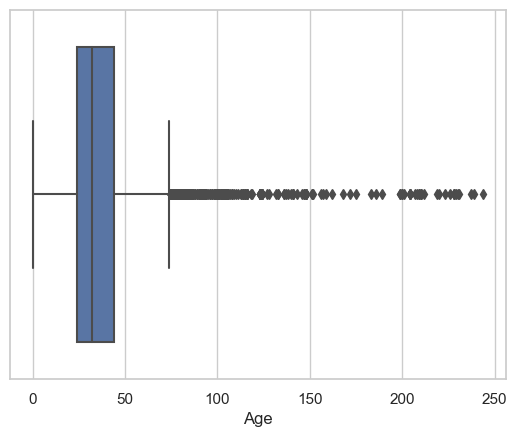

In [24]:
sns.set(style="whitegrid")
sns.boxplot(x='Age',data=user)

In [25]:
print(sorted(user['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [26]:
#removing age above 100 and below 5 
user.loc[(user['Age'] > 100) | (user['Age'] < 5) , 'Age' ] = np.NAN

In [27]:
user['Age'].isna().sum()

112010

In [28]:
#Filling the null values with mean
user['Age'].fillna(user['Age'].mean(), inplace = True)

user.duplicated().sum()



0

In [29]:
user.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [30]:
user.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,34.746638
std,80499.51502,10.545361
min,1.00000,5.000000
25%,69715.25000,29.000000
50%,139429.50000,34.746638
75%,209143.75000,35.000000
max,278858.00000,100.000000


there also null values in age column in almost 50 percent missing values in age column but age column is not necessory

In [31]:
print("Number of missing values in each column:",rating.isnull().sum()) 

Number of missing values in each column: User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [32]:
rating.describe()


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### it give stastics summary

### Duplicates

In [33]:
print("Number of duplicates:",books.duplicated().sum())

Number of duplicates: 0


In [34]:
print("Number of duplicates:",user.duplicated().sum())

Number of duplicates: 0


In [35]:
print("Number of duplicates:",rating.duplicated().sum())

Number of duplicates: 0


there are zero duplicates in books,ratnig and user if there is duplicates Eliminating duplicates can enhance the performance of machine learning models by preventing overfitting.

# EDA and Visualization


##  counts area count plot can be used to quickly visualize the distribution of categorical variables like frequency distribution,comparing categories,relationship between two categorecial

### user

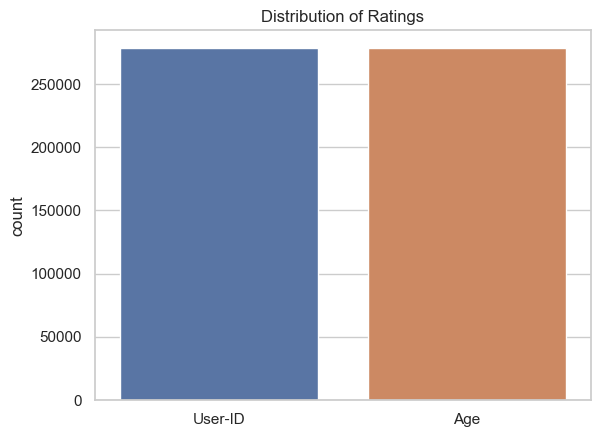

In [36]:
sns.countplot(data=user)
plt.title("Distribution of Ratings")
plt.show()

### the code generates a count plot to visually represent the distribution of ratings in the user dataset, facilitating an understanding of the frequency of each rating category

### rating

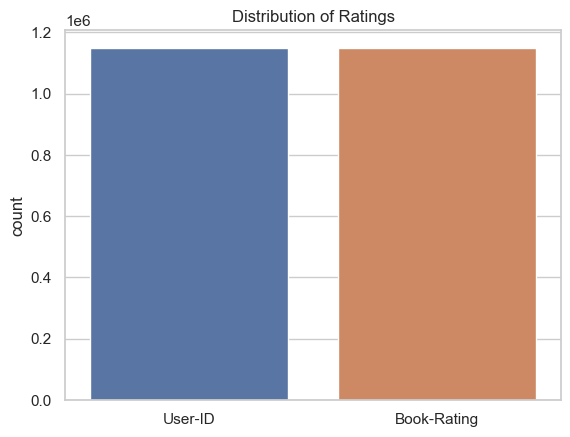

In [37]:
sns.countplot(data=rating)
plt.title("Distribution of Ratings")
plt.show()

### books 

In [38]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [39]:
top_publishers = books['Publisher'].value_counts().head(10)
print("Top Publishers:\n", top_publishers)

Top Publishers:
 Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: Publisher, dtype: int64


###  it counts the top publishers it counts the occurrences of each unique publisher.

In [40]:
top_authors = books['Book-Author'].value_counts().head(10)
print("Top Authors:\n", top_authors)

Top Authors:
 Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Author, dtype: int64


### it counts the top book-authors

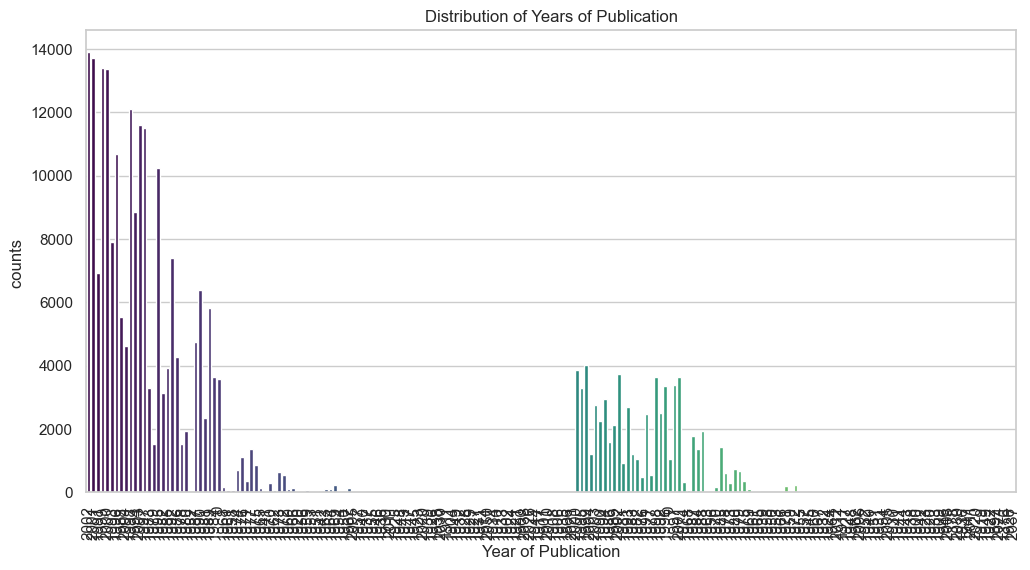

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year-Of-Publication', data=books, palette='viridis')
plt.title('Distribution of Years of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('counts ')
plt.xticks(rotation=90)
plt.show()

### the distribution book publication in diffrent years and then in that we are checking frequency of book release in each year

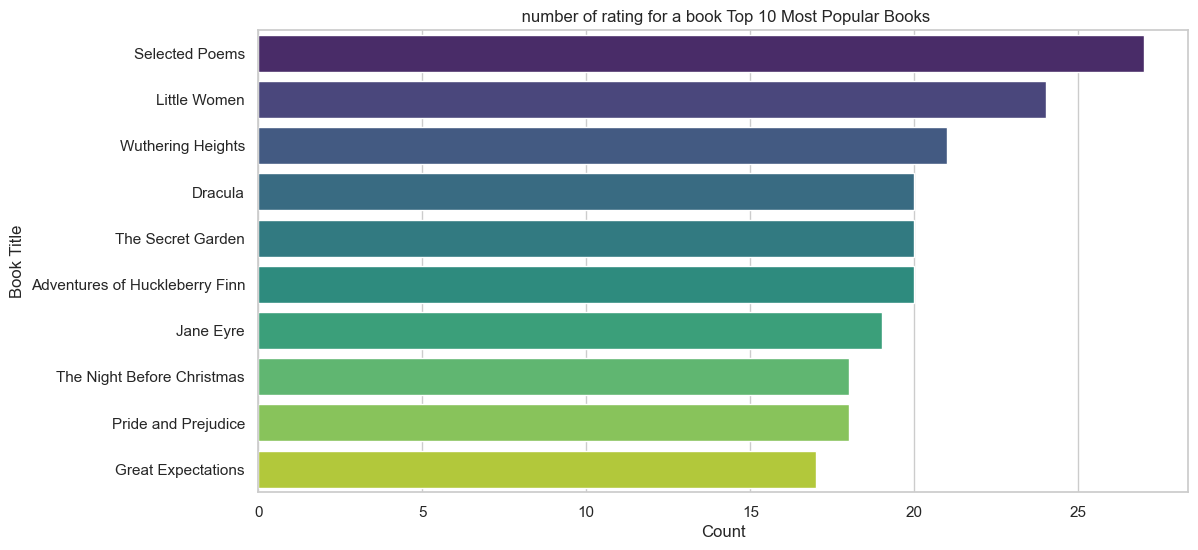

In [42]:
# Create a count plot for the 'Book-Title' column
plt.figure(figsize=(12, 6))
sns.countplot(y='Book-Title', data=books, palette='viridis', order=books['Book-Title'].value_counts().index[:10])
plt.title(' number of rating for a book Top 10 Most Popular Books')
plt.xlabel('Count')
plt.ylabel('Book Title')
plt.show()

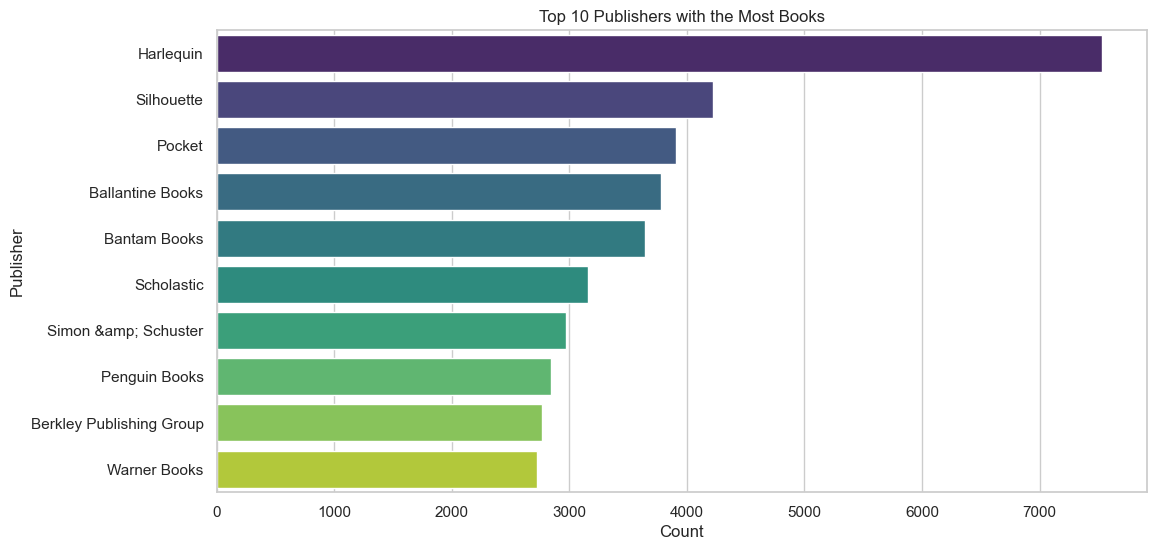

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Publisher', data=books, palette='viridis', order=books['Publisher'].value_counts().index[:10])
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.show()

In [44]:
sns.set(style="whitegrid")

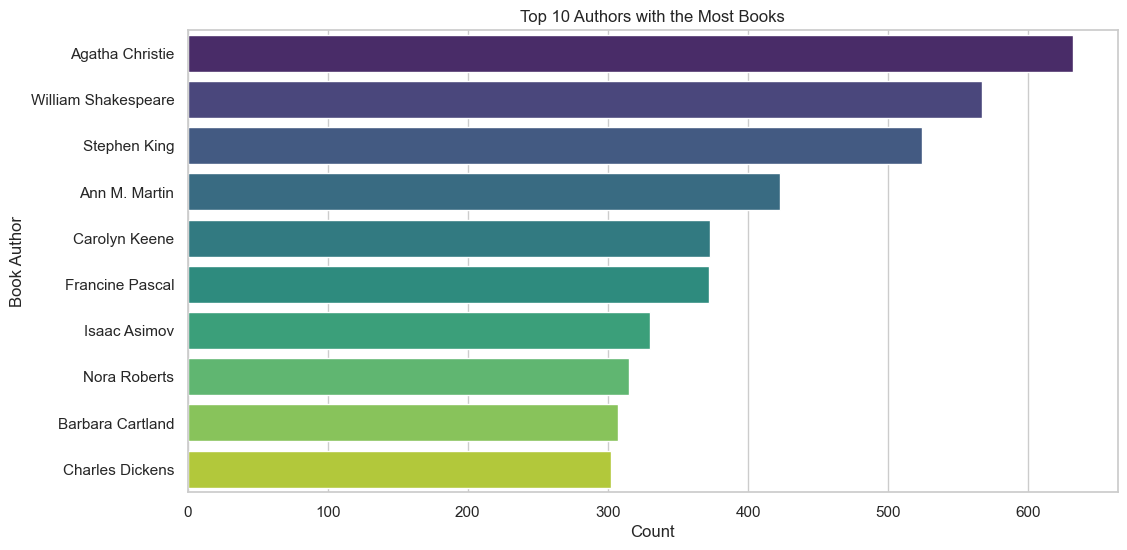

In [45]:
# Create a count plot for the 'Book-Author' column
plt.figure(figsize=(12, 6))
sns.countplot(y='Book-Author', data=books, palette='viridis', order=books['Book-Author'].value_counts().index[:10])
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Count')
plt.ylabel('Book Author')
plt.show()

<Axes: xlabel='Book-Rating', ylabel='count'>

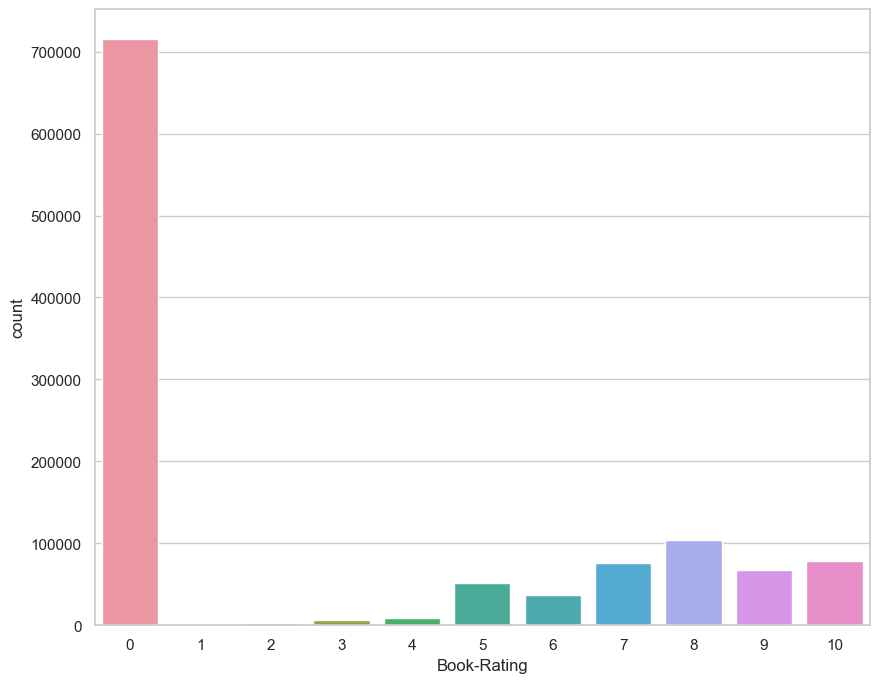

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=rating)

Text(0.5, 1.0, 'Explicit Ratings')

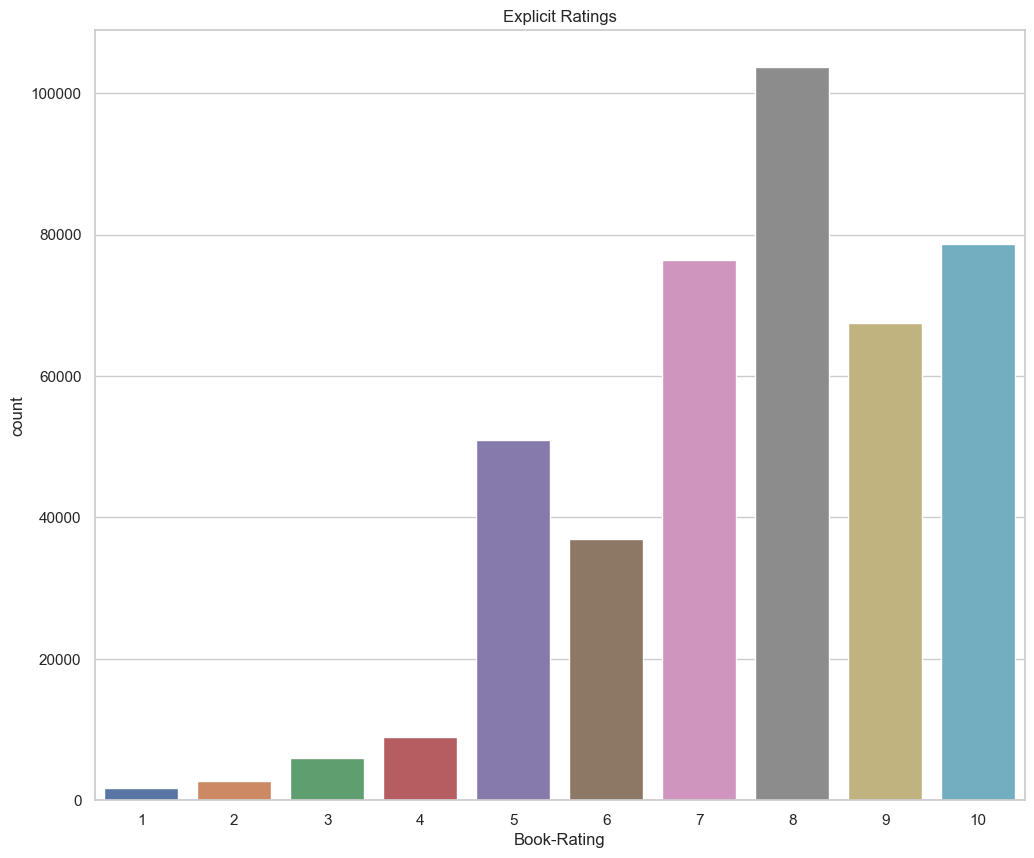

In [47]:
plt.figure(figsize=(12,10))
data = rating[rating['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

###  The plot is designed to visually represent the distribution of non-zero ratings, providing insights into the frequency of different explicit ratings.

In [48]:
ratings_explicit= rating[rating['Book-Rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= rating[rating['Book-Rating'] == 0]   # implicit ratings represented by 0

In [49]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [50]:
print(rating.shape)
print(ratings_explicit.shape)

(1149780, 3)
(433671, 3)


### Merging book_data dataset and ratings_explicit. Considering ISBNs that were explicitely rated for this recommendation system.

In [51]:
# Merging book_data dataset and ratings_explicit
new_book_df= rating.merge(books,on='ISBN')
new_book_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [52]:
rating.merge(books,on='ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031124,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031125,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031126,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031127,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [53]:
print(new_book_df.shape)

(1031129, 10)


In [54]:
new_book_df['Book-Title'].count()

1031129

In [55]:
new_book_df['Book-Title'].nunique()

241066

### So we've 135567 number of unique values in book_title columns. 

In [56]:
# top ten books as per book ratings and recommendation
top_ten_books= pd.DataFrame(new_book_df.groupby('Book-Title')['Book-Rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,Book-Rating
Book-Title,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723


### The above are the top 10 books recommendation as per ratings. But this are not based on some recommendation system. They are top 10 books as per ratings. 

In [57]:
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.746638
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.746638
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.746638
...,...,...,...
278853,278854,"portland, oregon, usa",34.746638
278854,278855,"tacoma, washington, united kingdom",50.000000
278855,278856,"brampton, ontario, canada",34.746638
278856,278857,"knoxville, tennessee, usa",34.746638


In [58]:
merged_df = pd.merge(new_book_df, user[['User-ID', 'Location', 'Age']], on='User-ID')

# Display the merged DataFrame
print(merged_df.head())

   User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1     2313  034545104X            5   
2     2313  0812533550            9   
3     2313  0679745580            8   
4     2313  0060173289            9   

                                         Book-Title       Book-Author  \
0                              Flesh Tones: A Novel        M. J. Rose   
1                              Flesh Tones: A Novel        M. J. Rose   
2     Ender's Game (Ender Wiggins Saga (Paperback))  Orson Scott Card   
3             In Cold Blood (Vintage International)     TRUMAN CAPOTE   
4  Divine Secrets of the Ya-Ya Sisterhood : A Novel     Rebecca Wells   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   
2                1986         Tor Books   
3                1994           Vintage   
4                1996     HarperCollins   

                                         Image-URL-S  \
0  http://i

In [59]:
merged_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",34.746638
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.000000
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.000000
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.000000
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1031124,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.000000
1031125,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",34.746638
1031126,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.000000
1031127,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.000000


In [60]:
merged_df = pd.DataFrame(merged_df)

# Save the DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)


In [61]:
merged_df['Age'].max()

100.0

In [62]:
merged_df['Age'].min()

5.0

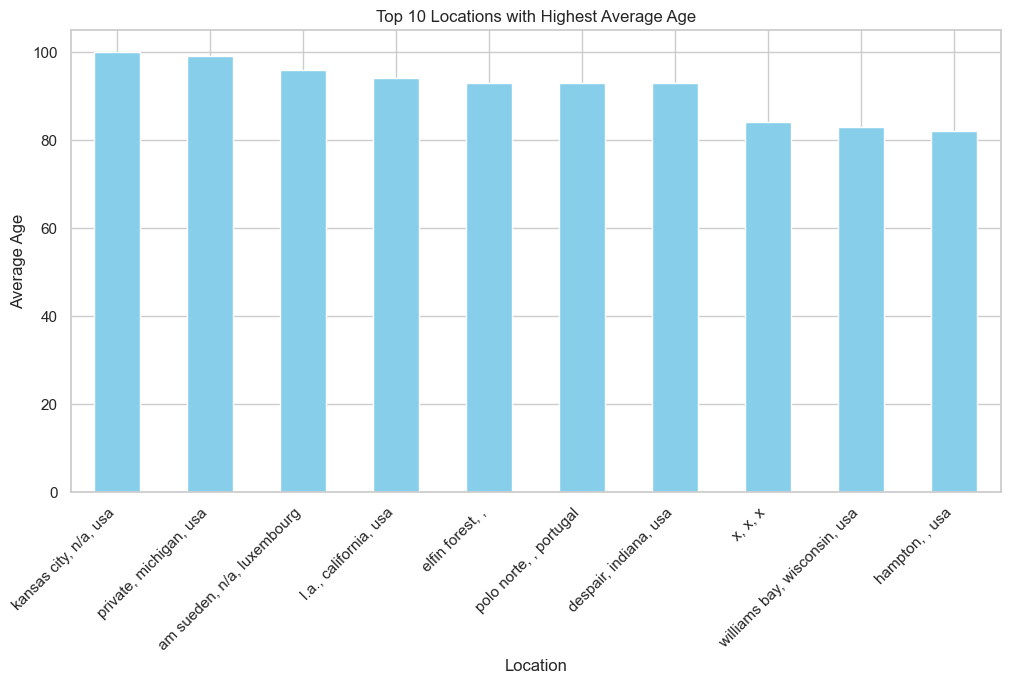

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'user_data'
# If not, replace 'user_data' with the actual name of your DataFrame

# Create a bar graph
plt.figure(figsize=(12, 6))
merged_df[['Location', 'Age']].groupby('Location').mean()['Age'].sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with Highest Average Age')
plt.xlabel('Location')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.show()


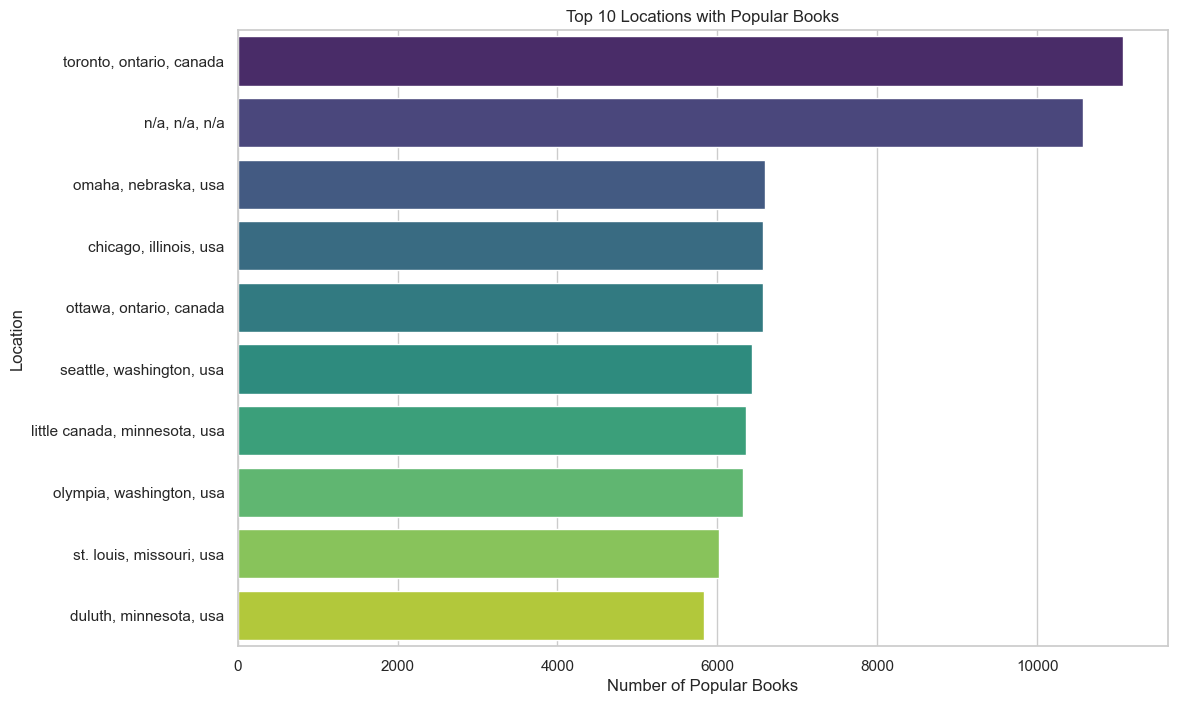

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the merged dataframe by 'Location' and count the number of unique 'Book-Title'
location_popularity = merged_df.groupby('Location')['Book-Title'].nunique().sort_values(ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=location_popularity.values, y=location_popularity.index, palette='viridis')

# Set labels and title
plt.xlabel('Number of Popular Books')
plt.ylabel('Location')
plt.title('Top 10 Locations with Popular Books')

# Show the plot
plt.show()


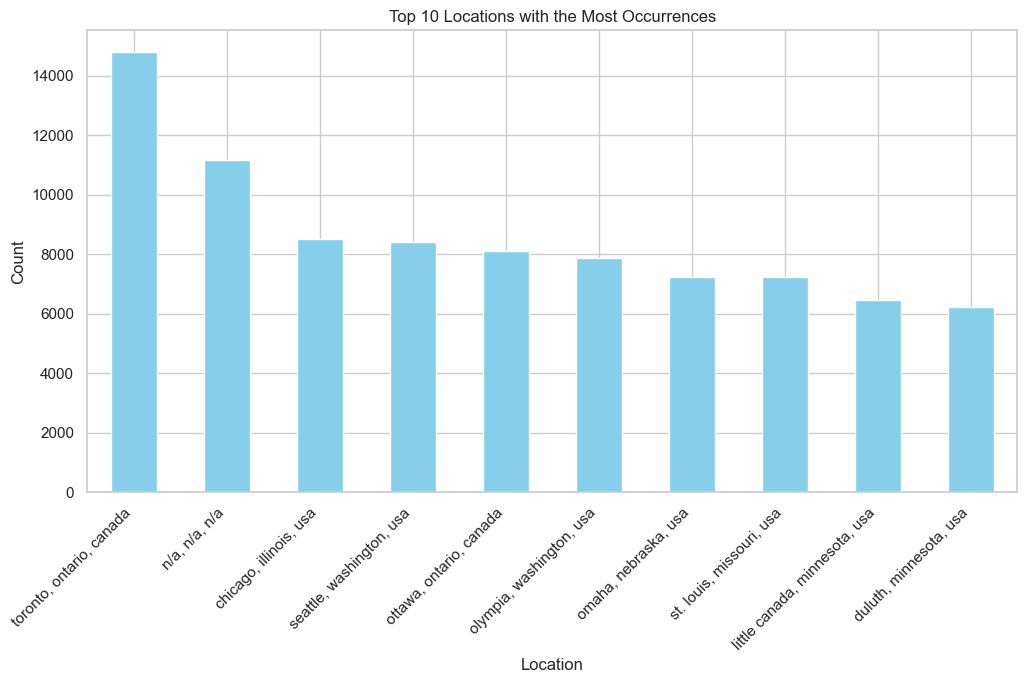

In [65]:
# Assuming your DataFrame is named 'user_data'
# If not, replace 'user_data' with the actual name of your DataFrame

# Create a bar graph based on the count of occurrences for each location
plt.figure(figsize=(12, 6))
merged_df['Location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Most Occurrences')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


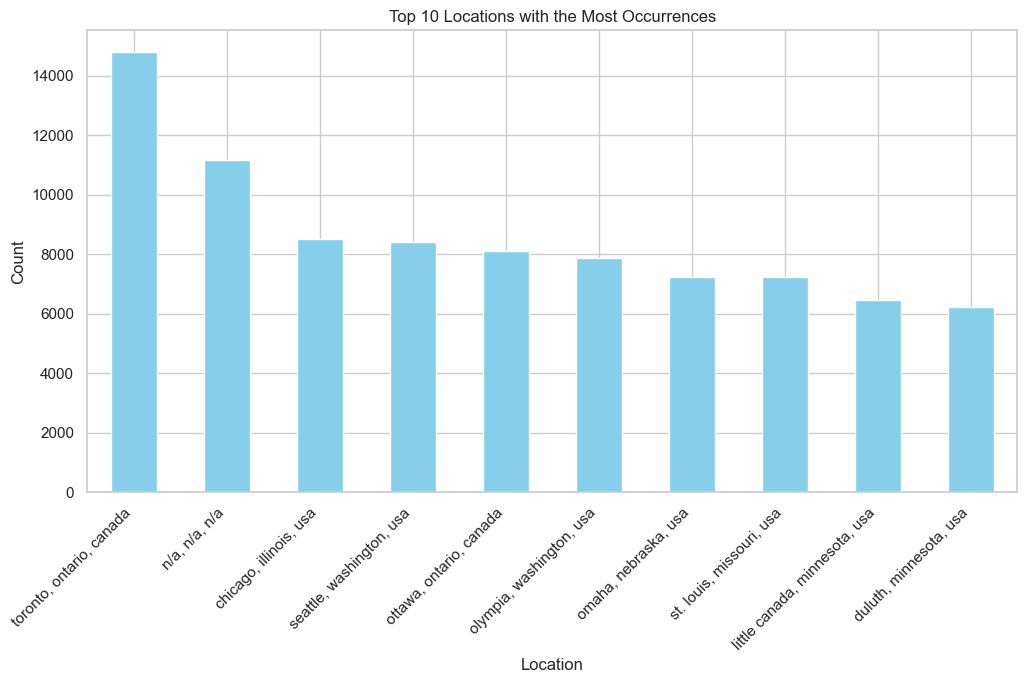

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'merged_df'
# If not, replace 'merged_df' with the actual name of your DataFrame

# Create a bar graph between Age and Location
plt.figure(figsize=(12, 6))
merged_df[['Location', 'Age']].groupby('Location').size().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Most Occurrences')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()




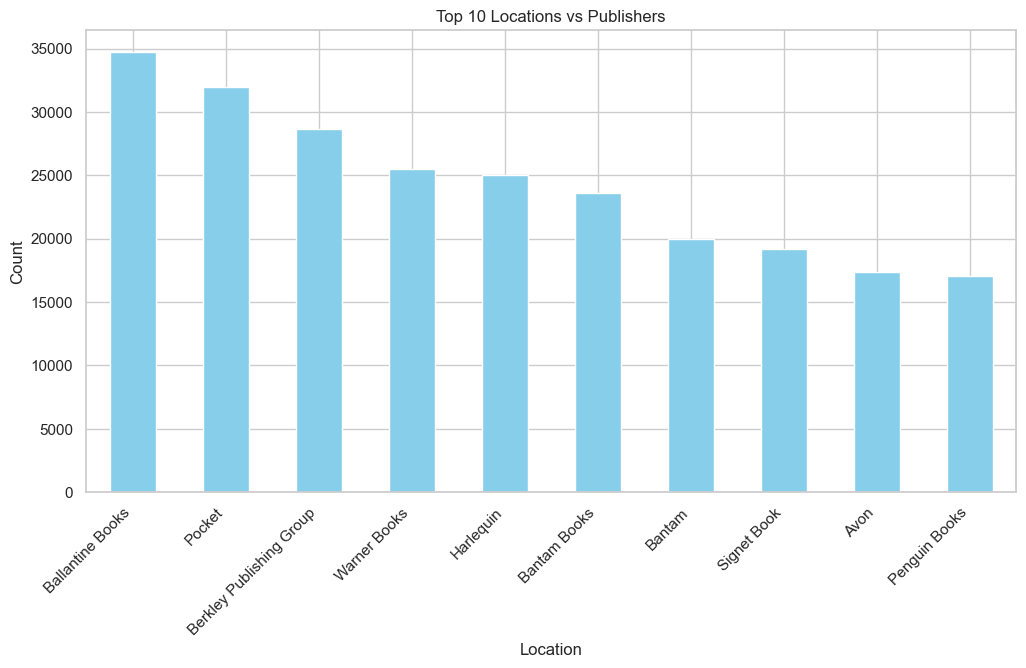

In [67]:
# Create a bar graph between Location and Publisher
plt.figure(figsize=(12, 6))
merged_df[['Location', 'Publisher']].groupby('Location')['Publisher'].value_counts().unstack().sum().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations vs Publishers')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

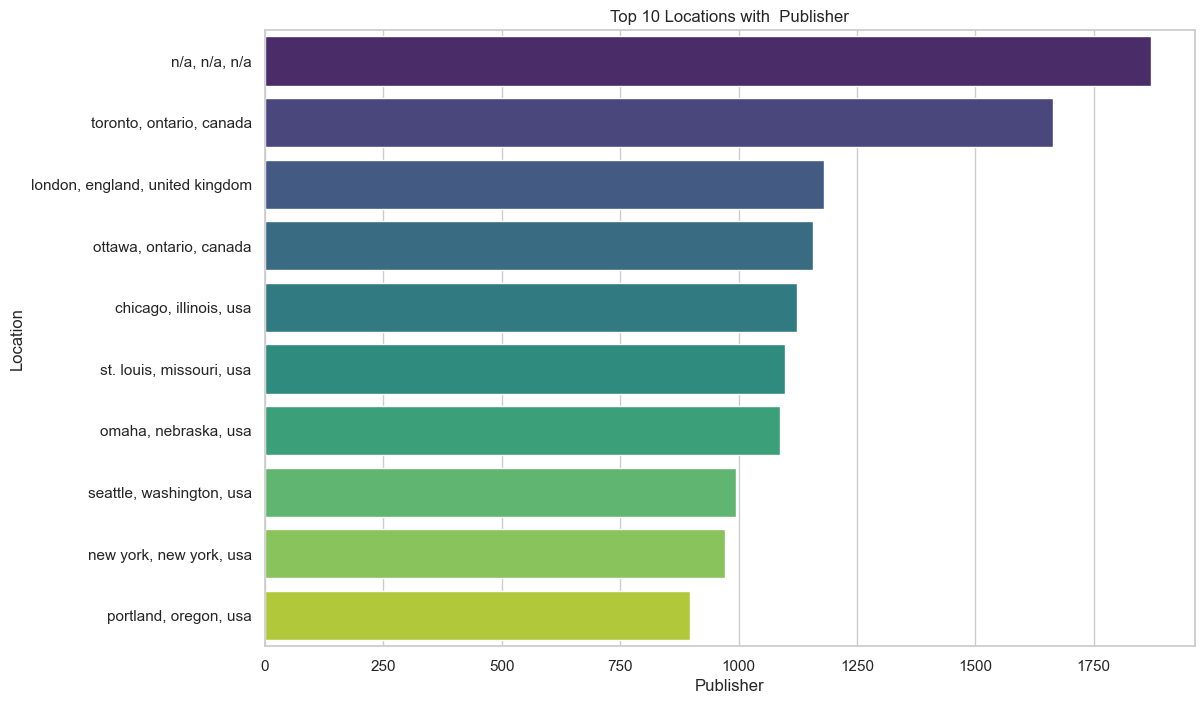

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the merged dataframe by 'Location' and count the number of unique 'Publisher'
location_popularity = merged_df.groupby('Location')['Publisher'].nunique().sort_values(ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=location_popularity.values, y=location_popularity.index, palette='viridis')

# Set labels and title
plt.xlabel('Publisher')
plt.ylabel('Location')
plt.title('Top 10 Locations with  Publisher')

# Show the plot
plt.show()

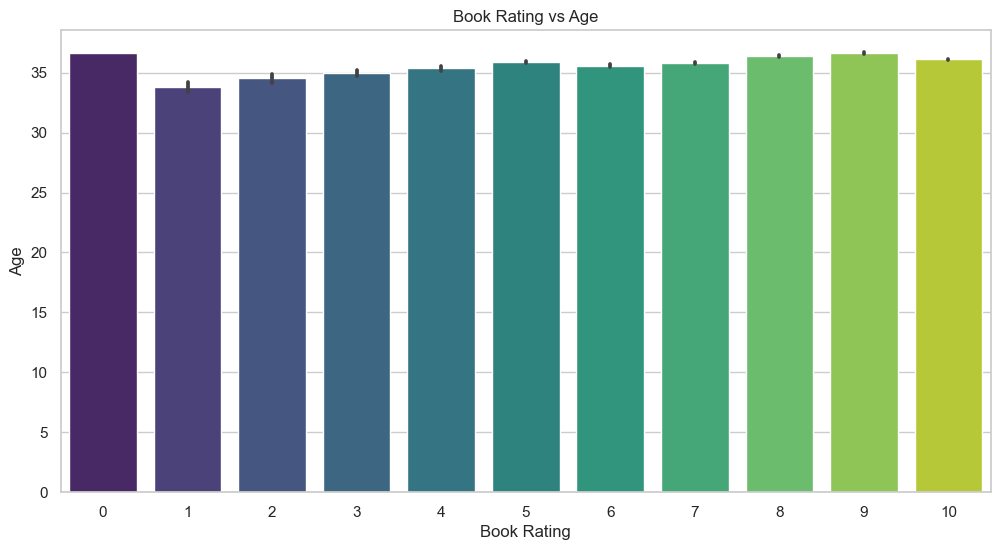

In [69]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot between Book-Rating and Age
plt.figure(figsize=(12, 6))
sns.barplot(x='Book-Rating', y='Age', data=merged_df, palette='viridis')
plt.title('Book Rating vs Age')
plt.xlabel('Book Rating')
plt.ylabel('Age')
plt.show()


In [70]:
merged_df['User-ID']

0          276725
1            2313
2            2313
3            2313
4            2313
            ...  
1031124    276442
1031125    276618
1031126    276647
1031127    276647
1031128    276660
Name: User-ID, Length: 1031129, dtype: int64

In [71]:
num_rating_df=merged_df.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [72]:
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [73]:
avg_rating_df=merged_df.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)

C:\Users\Anil\AppData\Local\Temp\ipykernel_20036\93753190.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df=merged_df.groupby('Book-Title').mean()['Book-Rating'].reset_index()


In [74]:
# Assuming 'User-ID' is the column containing user identifiers
user_id_input = int(input("Enter User-ID: "))

# Filter the DataFrame for ratings given by the user
user_ratings = merged_df[merged_df['User-ID'] == user_id_input]

# Group by 'Book-Title' and calculate the average rating
avg_ratings_for_user = user_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Sort the DataFrame by average rating in descending order
top_5_books_for_user = avg_ratings_for_user.sort_values(by='Book-Rating', ascending=False).head(5)

print(f"\nTop 5 Books with Highest Average Ratings for User-ID {user_id_input}:\n")
print(top_5_books_for_user[['Book-Title', 'Book-Rating']])


Enter User-ID: 254

Top 5 Books with Highest Average Ratings for User-ID 254:

                                            Book-Title  Book-Rating
12                                       American Gods         10.0
0                                                 1984          9.0
103     Harry Potter and the Sorcerer's Stone (Book 1)          9.0
175                         Sandman: The Dream Hunters          9.0
23   Assata: An Autobiography (Lawrence Hill &amp; ...          9.0


In [75]:
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241061,Ã?Â?lpiraten.,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,5.250000
241063,Ã?Â?sterlich leben.,7.000000
241064,Ã?Â?stlich der Berge.,2.666667


In [76]:
popularity_df=num_rating_df.merge(avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


In [77]:
popular_df=popularity_df[popularity_df['num_rating']>=200].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_rating,avg_rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60580,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191608,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211380,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [78]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-L','num_rating','avg_rating']]

In [79]:
merged_df.columns


Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')

## COllaborative filtering Based Recomendation system

In [80]:
x=merged_df.groupby('User-ID').count()['Book-Rating']>200
padhe_users=x[x].index

In [81]:
filtered_rating=new_book_df[new_book_df['User-ID'].isin(padhe_users)]

In [82]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_book=y[y].index

In [83]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_book)]

In [84]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [85]:
pt.fillna(0,inplace=True)

In [86]:
final_ratings = pd.DataFrame(final_ratings)
final_ratings.to_csv('final_ratings.csv', index=False)

We convert our table to a 2D matrix, and fill the missing values with zeros. We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

In [87]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
similarity_score=cosine_similarity(pt)

In [90]:
similarity_score.shape

(706, 706)

In [91]:
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [92]:
pt.columns

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=810)

In [160]:
user_id_or_book_title = input("Enter User ID or Book Title: ")

if user_id_or_book_title.isdigit():
    user_id = int(user_id_or_book_title)
    if user_id in pt.columns:
        top_rated_books = pt[user_id].dropna().sort_values(ascending=False).head(5)
        print(f"Top 5 rated books for User {user_id}:")
        for book_title, rating in top_rated_books.items():
            print(f"{book_title}: {rating}")
    else:
        print("Invalid User ID. Please enter a valid User ID.")
else:
    if user_id_or_book_title in pt.index:
        ratings_for_book = pt.loc[user_id_or_book_title].dropna()
        print(f"Ratings for book '{user_id_or_book_title}':")
        for user_id, rating in ratings_for_book.items():
            print(f"User {user_id}: {rating}")
    else:
        print(f"Book '{user_id_or_book_title}' not found in the dataset.")

Enter User ID or Book Title: 274061
Top 5 rated books for User 274061:
Insomnia: 10.0
The Gunslinger (The Dark Tower, Book 1): 10.0
Cujo: 10.0
Beloved: 10.0
Rose Madder: 10.0


In [161]:
def recommend(book_name):
    # index fetch
    index=np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [162]:
recommend('Cujo')

Pet Sematary
It
Christine
Skeleton Crew
Desperation


In [168]:
# Assuming 'User-ID' and 'Book-Title' are the columns containing user identifiers and book titles
user_id_input = int(input("Enter User-ID: "))
book_title_input = input("Enter Book Title: ")

# Filter the DataFrame for the specified user and book
user_book_rating = merged_df[(merged_df['User-ID'] == user_id_input) & (merged_df['Book-Title'] == book_title_input)]

# Check if the user has rated the specified book
if not user_book_rating.empty:
    # Display the rating for the specified book by the specified user
    rating = user_book_rating.iloc[0]['Book-Rating']
    print(f"\nRating of '{book_title_input}' by User-ID {user_id_input}: {rating}")
else:
    print(f"\nUser-ID {user_id_input} has not rated '{book_title_input}'.")


Enter User-ID: 274061
Enter Book Title: Desperation

Rating of 'Desperation' by User-ID 274061: 10


In [102]:
import pickle

In [103]:
filename ='recommend.sav'
pickle.dump

<function _pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)>

In [104]:
# Assuming 'User-ID' is the column containing user identifiers
user_id_input = int(input("Enter User-ID: "))

# Filter the DataFrame for ratings given by the user
user_ratings = merged_df[merged_df['User-ID'] == user_id_input]

# Group by 'Book-Title' and calculate the average rating
avg_ratings_for_user = user_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Sort the DataFrame by average rating in descending order
top_5_books_for_user = avg_ratings_for_user.sort_values(by='Book-Rating', ascending=False).head(5)

print(f"\nTop 5 Books with Highest Average Ratings for User-ID {user_id_input}:\n")
print(top_5_books_for_user[['Book-Title', 'Book-Rating']])


def recommend(book_name):
    # Check if the book is in the pivot table index
    if book_name in pt.index:
        # Find the index of the book in the pivot table
        index = pt.index.get_loc(book_name)
        
        # Get similarity scores for the specified book
        book_similarity_scores = similarity_score[index]
        
        # Create a list of tuples containing book indices and their similarity scores
        similar_items = [(i, score) for i, score in zip(range(len(book_similarity_scores)), book_similarity_scores)]
        
        # Sort the list based on similarity scores in descending order
        similar_items.sort(key=lambda x: x[1], reverse=True)
        
        # Extract indices of similar books (excluding the original book itself)
        similar_indices = [i[0] for i in similar_items[1:6]]
        
        # Print the titles of similar books
        print("Top 5 recommended books for", book_name, ":")
        for i in similar_indices:
            print(pt.index[i])
    else:
        print("Book not found in the dataset.")

# Example usage:
recommend("American Gods")



# Assuming 'User-ID' and 'Book-Title' are the columns containing user identifiers and book titles
user_id_input = int(input("Enter User-ID: "))
book_title_input = input("Enter Book Title: ")

# Filter the DataFrame for the specified user and book
user_book_rating = merged_df[(merged_df['User-ID'] == user_id_input) & (merged_df['Book-Title'] == book_title_input)]

# Check if the user has rated the specified book
if not user_book_rating.empty:
    # Display the rating for the specified book by the specified user
    rating = user_book_rating.iloc[0]['Book-Rating']
    print(f"\nRating of '{book_title_input}' by User-ID {user_id_input}: {rating}")
else:
    print(f"\nUser-ID {user_id_input} has not rated '{book_title_input}'.")


Enter User-ID: 254

Top 5 Books with Highest Average Ratings for User-ID 254:

                                            Book-Title  Book-Rating
12                                       American Gods         10.0
0                                                 1984          9.0
103     Harry Potter and the Sorcerer's Stone (Book 1)          9.0
175                         Sandman: The Dream Hunters          9.0
23   Assata: An Autobiography (Lawrence Hill &amp; ...          9.0
Top 5 recommended books for American Gods :
The Golden Compass (His Dark Materials, Book 1)
The Eyre Affair: A Novel
Seabiscuit: An American Legend
The Amber Spyglass (His Dark Materials, Book 3)
Coraline
Enter User-ID: 254
Enter Book Title: American Gods

Rating of 'American Gods' by User-ID 254: 10


In [107]:
import streamlit as st
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load your merged_df and pivot table here
# merged_df = pd.read_csv("your_data.csv")
# pt = pd.pivot_table(merged_df, values='Book-Rating', index='Book-Title', columns='User-ID', fill_value=0)

# Calculate cosine similarity matrix
similarity_score = cosine_similarity(pt)

@st.cache
def recommend(book_name):
    # Check if the book is in the pivot table index
    if book_name in pt.index:
        # Find the index of the book in the pivot table
        index = pt.index.get_loc(book_name)

        # Get similarity scores for the specified book
        book_similarity_scores = similarity_score[index]

        # Create a list of tuples containing book indices and their similarity scores
        similar_items = [(i, score) for i, score in zip(range(len(book_similarity_scores)), book_similarity_scores)]

        # Sort the list based on similarity scores in descending order
        similar_items.sort(key=lambda x: x[1], reverse=True)

        # Extract indices of similar books (excluding the original book itself)
        similar_indices = [i[0] for i in similar_items[1:6]]

        # Return the titles of similar books
        return [pt.index[i] for i in similar_indices]
    else:
        return []

def main():
    st.title("Book Recommendation App")

    user_choice = st.radio("Choose an option:", ("Recommend Books", "Check User Rating"))

    if user_choice == "Recommend Books":
        book_name = st.text_input("Enter a book title for recommendations:")
        if book_name:
            recommendations = recommend(book_name)
            if recommendations:
                st.markdown("### Top 5 Recommended Books:")
                st.write(recommendations)
            else:
                st.warning("Book not found in the dataset.")
    else:  # user_choice == "Check User Rating"
        user_id_input = st.number_input("Enter User-ID:")
        book_title_input = st.text_input("Enter Book Title:")
        
        # Filter the DataFrame for the specified user and book
        user_book_rating = merged_df[(merged_df['User-ID'] == user_id_input) & (merged_df['Book-Title'] == book_title_input)]

        # Display the rating or a message if the user has not rated the specified book
        if not user_book_rating.empty:
            rating = user_book_rating.iloc[0]['Book-Rating']
            st.success(f"Rating of '{book_title_input}' by User-ID {user_id_input}: {rating}")
        else:
            st.warning(f"User-ID {user_id_input} has not rated '{book_title_input}'.")

if __name__ == "__main__":
    main()


2024-01-03 21:17:35.165 
  command:

    streamlit run C:\ProgramData\Anaconda3\anconda\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
